In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import os

- ### 先將資料抓進來，並檢查看看，做一下整理

In [2]:
import numpy as np
import pandas as pd
pipe3 = pd.read_csv("林園管歷史資料擷取.csv",encoding="ANSI")
pipe3 = pipe3.drop(0)
# pipe3 = pipe3.drop("Unnamed: 113", axis = 1)
print(pipe3.shape)
pipe3.head()
# pipe3.describe(include = "all")

(2303, 36)


,Time,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率,台移動平均(20min),移動平均流量偏差,Unnamed: 8,Time.1,...,中+亞.3,台變化率.3,中+亞變化率.3,Unnamed: 29,Time.4,CLY_USI_03_FI_BC.4,FI-254-1.PV.4,中+亞.4,台變化率.4,中+亞變化率.4
1,2022/4/7 00:05,-1.500216,18211.16406,17843.47336,0.002995,0.018048,NaN,NaN,NaN,2022/4/21 00:05,...,12152.65018,32.550840,0.065733,NaN,2021/10/14 00:05,-2.369054,15315.05664,14862.94549,-0.031175,-0.013743
2,2022/4/7 00:10,-1.796756,18183.98047,17764.79059,-0.001493,-0.004410,NaN,NaN,NaN,2022/4/21 00:10,...,11927.50119,-0.063323,-0.018527,NaN,2021/10/14 00:10,1.488304,15167.20020,15294.83386,-0.009654,0.029058
3,2022/4/7 00:15,-1.485461,18182.50781,17817.83091,-0.000081,0.002986,18183.60742,-1.491632,NaN,2022/4/21 00:15,...,11460.60702,-0.029933,-0.039144,NaN,2021/10/14 00:15,0.769236,15244.94531,15262.34876,0.005126,-0.002124
4,2022/4/7 00:20,-0.029753,18010.86328,17905.53583,-0.009440,0.004922,18147.12891,-0.790778,NaN,2022/4/21 00:20,...,11841.97966,-0.064814,0.033277,NaN,2021/10/14 00:20,3.103397,15181.18945,15564.20866,-0.004182,0.019778
5,2022/4/7 00:25,0.226940,18056.63086,17997.47436,0.002541,0.005135,18108.49561,-0.061238,NaN,2022/4/21 00:25,...,11678.08348,0.044504,-0.013840,NaN,2021/10/14 00:25,-6.937265,15803.76855,14685.02918,0.041010,-0.056487


In [3]:
pipe3.describe(include = "all")

,Time,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率,台移動平均(20min),移動平均流量偏差,Unnamed: 8,Time.1,...,中+亞.3,台變化率.3,中+亞變化率.3,Unnamed: 29,Time.4,CLY_USI_03_FI_BC.4,FI-254-1.PV.4,中+亞.4,台變化率.4,中+亞變化率.4
count,2303,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2301.000000,2301.000000,0.0,2279,...,1727.000000,1727.000000,1727.000000,0.0,2303,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
unique,2303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2279,...,NaN,NaN,NaN,NaN,2303,NaN,NaN,NaN,NaN,NaN
top,2022/4/7 00:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022/4/21 00:05,...,NaN,NaN,NaN,NaN,2021/10/14 00:05,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.388515,18218.901941,18198.842367,0.000074,0.000151,18219.138835,0.390036,NaN,NaN,...,12589.038785,0.019135,0.000217,NaN,NaN,-0.530241,16458.662628,16288.782447,0.000129,0.000657
std,NaN,2.369656,408.398825,567.370506,0.013047,0.016687,375.500780,2.146761,NaN,NaN,...,1400.394313,0.783502,0.012472,NaN,NaN,4.135846,423.930169,543.326523,0.014471,0.036063
min,NaN,-14.237984,15919.327150,15988.052020,-0.064099,-0.076681,16015.531010,-12.621112,NaN,NaN,...,9787.424276,-0.152609,-0.070606,NaN,NaN,-91.668839,14596.462890,8436.295710,-0.090857,-0.483516
25%,NaN,-1.137796,18051.263670,17853.681035,-0.007586,-0.010620,18063.835450,-1.013164,NaN,NaN,...,11404.616100,-0.007918,-0.006645,NaN,NaN,-2.202129,16265.724610,16026.177535,-0.007480,-0.015277
50%,NaN,0.357233,18281.957030,18165.078060,-0.000064,0.000396,18283.296390,0.257343,NaN,NaN,...,12320.578670,-0.000048,0.000200,NaN,NaN,-0.284086,16479.697270,16322.139450,-0.000486,0.000347
75%,NaN,1.974995,18470.547850,18556.502155,0.007106,0.010877,18450.789550,1.778038,NaN,NaN,...,13639.201155,0.007984,0.006950,NaN,NaN,1.358872,16687.204105,16601.122125,0.007632,0.015417


In [4]:
pipe3.columns

Index(['Time', 'CLY_USI_03_FI_BC', 'FI-254-1.PV', '中+亞', '台變化率', '中+亞變化率',
       '台移動平均(20min)', '移動平均流量偏差', 'Unnamed: 8', 'Time.1',
       'CLY_USI_03_FI_BC.1', 'FI-254-1.PV.1', '中+亞.1', '台變化率.1', '中+亞變化率.1',
       'Unnamed: 15', 'Time.2', 'CLY_USI_03_FI_BC.2', 'FI-254-1.PV.2', '中+亞.2',
       '台變化率.2', '中+亞變化率.2', 'Unnamed: 22', 'Time.3', 'CLY_USI_03_FI_BC.3',
       'FI-254-1.PV.3', '中+亞.3', '台變化率.3', '中+亞變化率.3', 'Unnamed: 29', 'Time.4',
       'CLY_USI_03_FI_BC.4', 'FI-254-1.PV.4', '中+亞.4', '台變化率.4', '中+亞變化率.4'],
      dtype='object')

In [5]:
type(pipe3)

pandas.core.frame.DataFrame

In [6]:
# ## 可以用這個方法重新整理part1 的資料，但較不推，因為改個title可能就不能用了
# part_1 = ['Time', 'CLY_USI_03_FI_BC', 'FI-254-1.PV', '中+亞', '台變化率', '中+亞變化率']
# part_1_df = pipe3[part_1]
# part_1_df.index = part_1_df['Time']
# part_1_df = part_1_df.drop(['Time'], axis='columns')
# part_1_df.isnull().max() # 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面

+ **因為資料中分了很多個時間區段，得切成好幾段分批訓練**
+ **用這個方法重新整理part1 的資料，較推，因為改個title還能用**

In [7]:
part_1_df = pipe3.iloc[:,0:6]
part_1_df.index = part_1_df.iloc[:,0]
part_1_df.isnull().max() # 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面
part_1_df = part_1_df.drop(part_1_df.columns[0], axis='columns')
part_1_df

,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率
Time,,,,,
2022/4/7 00:05,-1.500216,18211.16406,17843.47336,0.002995,0.018048
2022/4/7 00:10,-1.796756,18183.98047,17764.79059,-0.001493,-0.004410
2022/4/7 00:15,-1.485461,18182.50781,17817.83091,-0.000081,0.002986
2022/4/7 00:20,-0.029753,18010.86328,17905.53583,-0.009440,0.004922
2022/4/7 00:25,0.226940,18056.63086,17997.47436,0.002541,0.005135
...,...,...,...,...,...
2022/4/14 23:35,0.415472,17945.28516,17919.73659,0.009418,-0.001940
2022/4/14 23:40,-1.595123,17919.31445,17539.53723,-0.001447,-0.021217
2022/4/14 23:45,-1.075228,17957.92969,17667.95885,0.002155,0.007322


**畫出來看看**

array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current

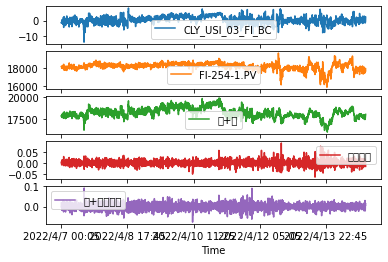

In [8]:
part_1_df.plot(subplots=True)

**設定多少筆資料當training data**

In [9]:
TRAIN_SPLIT= 1500

**下面是用來測試再現性用的**

In [10]:
tf.random.set_seed(13)

**做資料正規化**

In [11]:
# ## 正規化 normalize MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# X = pd.DataFrame(X)
# X

**胡老師DL-PART3-TF2_RNNs-Ch06-RNNs_Workshop_5-RNNs_for_Time_Series_Forecasting.ipynb這份檔中的正規化方法**

In [12]:
dataset = part_1_df.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [13]:
dataset = (dataset-data_mean)/data_std

In [14]:
dataset.shape

(2303, 5)

# 從單變數的方式做做看

In [15]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size # start_index最少要比history_size後面
    if end_index is None:
        end_index = len(dataset) - target_size # 如果沒設定end_index就用整個資料大小往前推target_size的量來設定，就是直接預測最後一段資料

    for i in range(start_index, end_index): # 從start_index到end_index一筆一筆資料移動窗格，移動一次就把當下窗格裡的資料放入list中當一筆資料，一串一串放
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [16]:
uni_data = part_1_df['FI-254-1.PV']
uni_data.head()

Time
2022/4/7 00:05    18211.16406
2022/4/7 00:10    18183.98047
2022/4/7 00:15    18182.50781
2022/4/7 00:20    18010.86328
2022/4/7 00:25    18056.63086
Name: FI-254-1.PV, dtype: float64

array([<AxesSubplot:xlabel='Time'>], dtype=object)

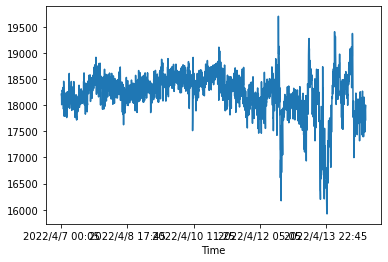

In [17]:
uni_data.plot(subplots=True)

In [18]:
uni_data = uni_data.values

**正規化**

In [19]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [20]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [21]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

秀秀看`univariate_data`處裡完的資料如何

In [22]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-0.508015  ]
 [-0.62473214]
 [-0.63105524]
 [-1.36803877]
 [-1.17152827]
 [-1.22572738]
 [-1.26728027]
 [-0.17388088]
 [-0.27676105]
 [-0.29072386]
 [-0.9620613 ]
 [-0.42402025]
 [ 0.03820252]
 [-0.50772149]
 [-0.83224515]
 [-1.36788781]
 [-1.72284447]
 [-1.63755827]
 [ 0.55557195]
 [ 0.11311515]]

 Target temperature to predict
-0.8997780480145408


**資料做好了，試圖畫畫看長怎樣**

In [23]:
def create_time_steps(length):
    return list(range(-length, 0))

In [24]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

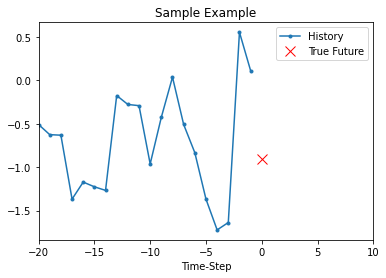

In [25]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

**做一個baseline來比較用，這個方法是用過去的平均直接當預測值**

In [26]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

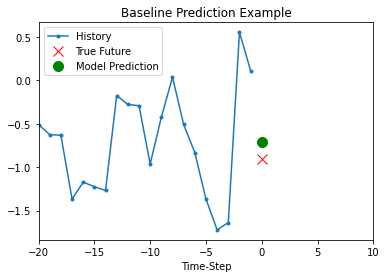

In [27]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

## 接下來使用RNN

Tensorflow Dataset 正式的名稱為 tf.data API，它是一個 Python Generator，可以視需要逐批讀取必要資料，不必一股腦將資料全部讀取放在記憶體，若資料量很大時，記憶體就爆了。另外，它還有快取(Cache)、預取(Prefetch)、篩選(Filter)、轉換(Map)...等功能，值得我們一探究竟。

In [28]:
## 1個batch共取256筆資料，其中一筆資料是前面設定每20筆資料當作一個窗格，然後每一個窗格的feature與label對上後打亂
## 其中每10000筆原始資料打亂一次，在這裡基本就是全部打亂一次
## 但因為一個窗格的feature與label還是在同一個train_univariate的tuple裡面，所以打亂比較沒關係
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [29]:
# iterator,查看一下tf.data出來是什麼東西
it = iter(train_univariate)
# 一次取一筆
print("next1 = ",next(it)[0],"\n", "next2 = ",next(it)[1].shape)

next1 =  tf.Tensor(
[[[-0.30302619]
  [-0.50656422]
  [ 0.54591122]
  ...
  [ 0.30309293]
  [-0.68699023]
  [-1.49704987]]

 [[-1.51206931]
  [-0.86579775]
  [-1.52143653]
  ...
  [-2.42821257]
  [-2.19855199]
  [-0.92043292]]

 [[-0.65384853]
  [ 0.26865137]
  [-0.30743724]
  ...
  [-0.64176424]
  [-0.81773725]
  [-0.14047924]]

 ...

 [[ 0.38120906]
  [ 0.20145389]
  [ 0.84616564]
  ...
  [ 0.85692496]
  [ 0.87288359]
  [ 1.13361452]]

 [[ 0.65383979]
  [ 0.48348541]
  [-0.40583088]
  ...
  [-0.71524287]
  [-0.82773345]
  [-0.84186394]]

 [[ 0.83506249]
  [-0.5373578 ]
  [ 1.3331524 ]
  ...
  [ 0.03506613]
  [-0.41866154]
  [-0.86400313]]], shape=(256, 20, 1), dtype=float64) 
 next2 =  (256,)


In [30]:
x_train_uni.shape # 共1480個窗格，1個窗格20筆資料，1個變數

(1480, 20, 1)

**開始用LSTM建模**

In [31]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [32]:
## 試丟一筆進去看預測出來的值，他的shape是不是對的(看來是對的，1個batch 256組資料，每一組有1個預測值)

for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

8/8 [==============================] - 1s 2ms/step
(256, 1)


In [33]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 4s 9ms/step - loss: 0.6967 - val_loss: 1.5453
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5598 - val_loss: 1.3830
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5490 - val_loss: 1.3378
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5442 - val_loss: 1.3237
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5404 - val_loss: 1.3125
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5394 - val_loss: 1.3065
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5373 - val_loss: 1.2996
Epoch 8/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5355 - val_loss: 1.2911
Epoch 9/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5329 - val_loss: 1.2843
Epoch 10/10
200/200 [==============================] - 1s 6ms/step - loss: 0.5307 - val_loss: 1.2815

8/8 [==============================] - 0s 2ms/step


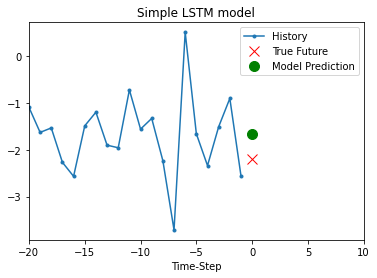

8/8 [==============================] - 0s 2ms/step


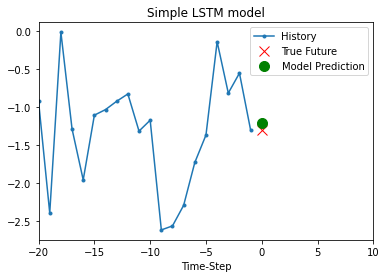

8/8 [==============================] - 0s 2ms/step


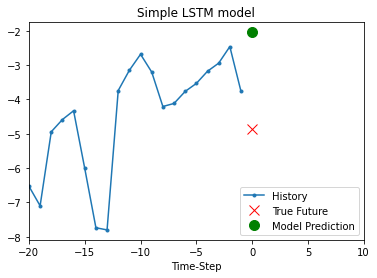

In [34]:
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

# 多變數的方式

### 前面資料已經整理完，再複製過來一次，方便閱讀

In [174]:
## 先將第一組資料分離出來訓練看看

part_1_df = pipe3.iloc[:,0:6]
part_1_df.index = part_1_df.iloc[:,0]
part_1_df.isnull().max() # 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面
part_1_df = part_1_df.drop(part_1_df.columns[0], axis='columns')
part_1_df

,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率
Time,,,,,
2022/4/7 00:05,-1.500216,18211.16406,17843.47336,0.002995,0.018048
2022/4/7 00:10,-1.796756,18183.98047,17764.79059,-0.001493,-0.004410
2022/4/7 00:15,-1.485461,18182.50781,17817.83091,-0.000081,0.002986
2022/4/7 00:20,-0.029753,18010.86328,17905.53583,-0.009440,0.004922
2022/4/7 00:25,0.226940,18056.63086,17997.47436,0.002541,0.005135
...,...,...,...,...,...
2022/4/14 23:35,0.415472,17945.28516,17919.73659,0.009418,-0.001940
2022/4/14 23:40,-1.595123,17919.31445,17539.53723,-0.001447,-0.021217
2022/4/14 23:45,-1.075228,17957.92969,17667.95885,0.002155,0.007322


In [176]:
## 這邊是測試用，把變化率全部+3，強迫他全部變成正的，然後再訓練看看結果如何
part_1_df.iloc[:,-1] = part_1_df.iloc[:,-1] + 3
part_1_df.iloc[:,-2] = part_1_df.iloc[:,-2] + 3
part_1_df.describe(include='all')

,CLY_USI_03_FI_BC,FI-254-1.PV,中+亞,台變化率,中+亞變化率
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,0.388515,18218.901941,18198.842367,3.000074,6.000151
std,2.369656,408.398825,567.370506,0.013047,0.016687
min,-14.237984,15919.327150,15988.052020,2.935901,5.923319
25%,-1.137796,18051.263670,17853.681035,2.992414,5.989380
50%,0.357233,18281.957030,18165.078060,2.999936,6.000396
75%,1.974995,18470.547850,18556.502155,3.007105,6.010877
max,8.213395,19703.919920,19885.668610,3.089227,6.092215


array([<AxesSubplot:xlabel='Time.1'>, <AxesSubplot:xlabel='Time.1'>,
       <AxesSubplot:xlabel='Time.1'>, <AxesSubplot:xlabel='Time.1'>,
       <AxesSubplot:xlabel='Time.1'>], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current

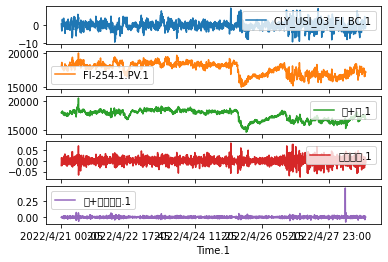

In [113]:
## 畫畫看，會出現警告應該是中文字無法顯示

part_1_df.plot(subplots=True)

### 做正規化

In [177]:
dataset = part_1_df.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [178]:
dataset = (dataset-data_mean)/data_std

### 多變量的參數設置，寫成函數等等使用

In [39]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

### 設置參數，並將窗格大小、預測未來多久的值、取資料一次取幾筆(減少資料量，這裡不用，資料不大)定義出來

In [179]:
past_history = 20
future_target = 1
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset[:, 3:], dataset[:, -1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset[:, 3:], dataset[:, -1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [180]:
## 看一個窗格長怎樣，目前一個窗格共8筆資料(看past_history設定)，每筆資料有2個feature(台聚流量變化率與中油+亞聚流量變化率)

print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (20, 2)


In [181]:
## tf.data，弄成generator，忘記翻前面單變量的地方看

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

### LSTM建模

In [182]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [183]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

8/8 [==============================] - 0s 3ms/step
(256, 1)


In [184]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 5s 14ms/step - loss: 0.7457 - val_loss: 0.5673
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6985 - val_loss: 0.5703
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.6791 - val_loss: 0.5567
Epoch 4/10
200/200 [==============================] - 2s 12ms/step - loss: 0.6607 - val_loss: 0.5485
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 0.6485 - val_loss: 0.5512
Epoch 6/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6368 - val_loss: 0.5657
Epoch 7/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6266 - val_loss: 0.5755
Epoch 8/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6142 - val_loss: 0.5969
Epoch 9/10
200/200 [==============================] - 3s 13ms/step - loss: 0.5994 - val_loss: 0.6150
Epoch 10/10
200/200 [==============================] - 3s 13ms/step - loss: 0.5841 - val_lo

In [122]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

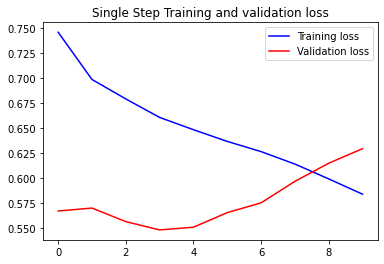

In [185]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

8/8 [==============================] - 0s 3ms/step


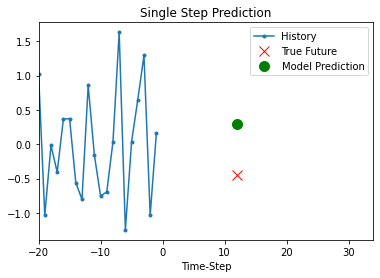

8/8 [==============================] - 0s 3ms/step


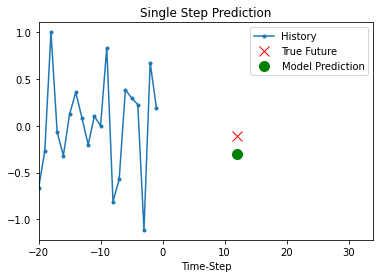

8/8 [==============================] - 0s 3ms/step


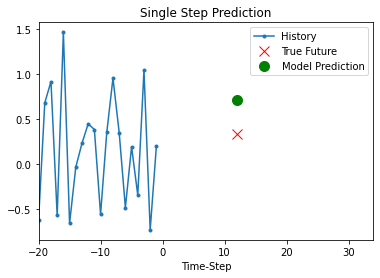

In [186]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()

### 換下一組資料訓練看看

In [112]:
## 換第二組資料分離出來訓練看看

part_1_df = pipe3.iloc[:,9:15].copy()
part_1_df.index = part_1_df.iloc[:,0]

# 檢查每一格是否有null值，false = 0, True = 1, 如果有True表示有null藏在裡面
part_1_df.isnull().max() 
part_1_df = part_1_df.drop(part_1_df.columns[0], axis='columns')

# 直接去除missing data
part_1_df = part_1_df.dropna()

## 把偏差值大於10或小於-10的拿掉，當作離群值
keep_indexs = (part_1_df.iloc[:,0]> -10) & (part_1_df.iloc[:,0]< 10)
part_1_df = part_1_df[keep_indexs]

part_1_df

,CLY_USI_03_FI_BC.1,FI-254-1.PV.1,中+亞.1,台變化率.1,中+亞變化率.1
Time.1,,,,,
2022/4/21 00:05,0.456938,18027.29883,18009.59157,-0.021432,-0.002111
2022/4/21 00:10,0.253395,18136.83984,18082.66035,0.006076,0.004057
2022/4/21 00:15,-1.574295,18407.08984,18023.34915,0.014901,-0.003280
2022/4/21 00:20,-2.608507,18462.17578,17895.37368,0.002993,-0.007101
2022/4/21 00:25,-3.278737,18651.43555,17962.49268,0.010251,0.003751
...,...,...,...,...,...
2022/4/28 21:35,1.111757,17044.02930,17134.52355,0.009824,0.012910
2022/4/28 21:40,-1.165910,17160.07617,16863.46339,0.006809,-0.015820
2022/4/28 21:45,-1.996932,17323.11719,16885.91698,0.009501,0.001331


### 換做multi-step看看

In [154]:
## 往後預測3筆資料(future_target設定)
future_target = 5
x_train_multi, y_train_multi = multivariate_data(dataset[:, 3:], dataset[:, -1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset[:, 3:], dataset[:, -1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [155]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (100, 2)

 Target to predict : (5,)


In [156]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [131]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
                 label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
               label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

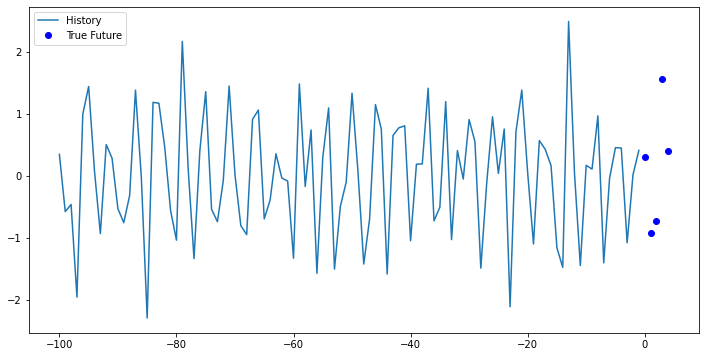

In [157]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [163]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(5)) # 要隨著你要預測幾筆資料做修改

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [164]:
for x, y in val_data_multi.take(1):
    print (multi_step_model.predict(x).shape)

8/8 [==============================] - 1s 12ms/step
(256, 5)


In [165]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 23s 101ms/step - loss: 0.7725 - val_loss: 0.5489
Epoch 2/10
200/200 [==============================] - 23s 115ms/step - loss: 0.6944 - val_loss: 0.5281
Epoch 3/10
200/200 [==============================] - 26s 132ms/step - loss: 0.6702 - val_loss: 0.5184
Epoch 4/10
200/200 [==============================] - 26s 130ms/step - loss: 0.6613 - val_loss: 0.5317
Epoch 5/10
200/200 [==============================] - 28s 141ms/step - loss: 0.6502 - val_loss: 0.5480
Epoch 6/10
200/200 [==============================] - 25s 127ms/step - loss: 0.6382 - val_loss: 0.5475
Epoch 7/10
200/200 [==============================] - 24s 122ms/step - loss: 0.6253 - val_loss: 0.5487
Epoch 8/10
200/200 [==============================] - 24s 122ms/step - loss: 0.6136 - val_loss: 0.5669
Epoch 9/10
200/200 [==============================] - 25s 125ms/step - loss: 0.6032 - val_loss: 0.5797
Epoch 10/10
200/200 [==============================] - 27s 137ms/step - l

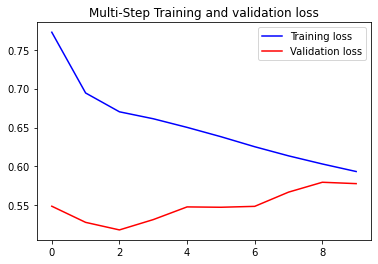

In [166]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

8/8 [==============================] - 0s 15ms/step


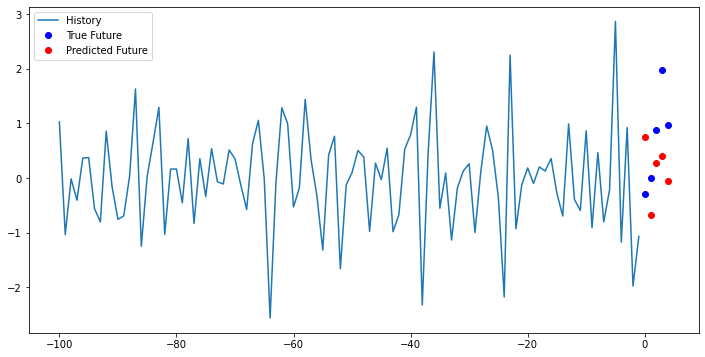

8/8 [==============================] - 0s 13ms/step


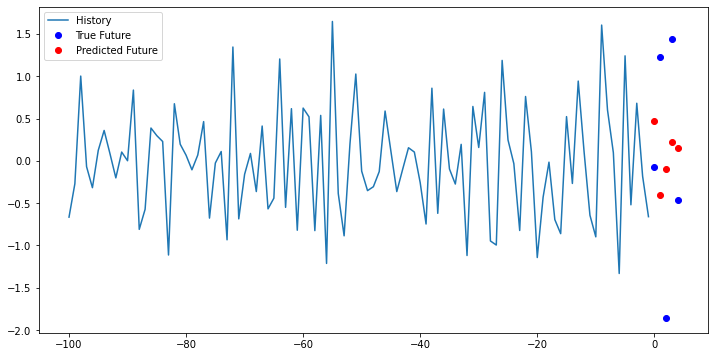

6/6 [==============================] - 1s 13ms/step


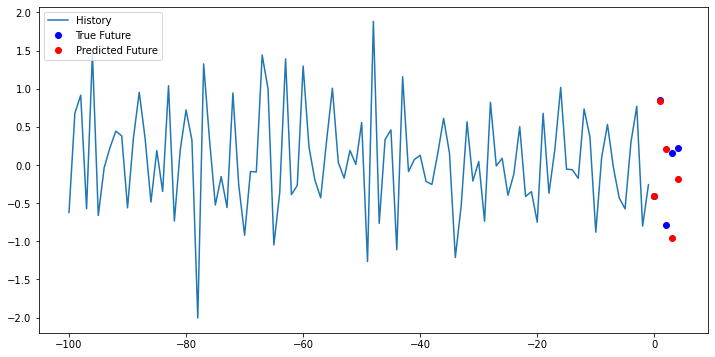

In [167]:
## 拿三筆資料出來畫畫看
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

## 試圖把每一組資料取出來，並把離群值拿掉，放到list中，然後丟進去訓練看結果

In [191]:
#先把全部資料一組一組放進list中
all_df = [pipe3.iloc[:,0:6].copy(), pipe3.iloc[:,9:15].copy(), pipe3.iloc[:,16:22].copy(), pipe3.iloc[:,23:29].copy(), pipe3.iloc[:,30:36].copy(), ]
all_df[2]

,Time.2,CLY_USI_03_FI_BC.2,FI-254-1.PV.2,中+亞.2,台變化率.2,中+亞變化率.2
1,2022/5/19 00:05,1.644252,14113.86621,14248.14154,-0.000955,-0.003986
2,2022/5/19 00:10,1.588008,14134.21777,14260.67843,0.001442,0.000880
3,2022/5/19 00:15,2.781575,13875.63770,14169.78080,-0.018295,-0.006374
4,2022/5/19 00:20,4.212529,13683.78320,14181.16902,-0.013827,0.000804
5,2022/5/19 00:25,4.129728,13641.11816,14124.41819,-0.003118,-0.004002
...,...,...,...,...,...,...
2299,NaN,NaN,NaN,NaN,NaN,NaN
2300,NaN,NaN,NaN,NaN,NaN,NaN
2301,NaN,NaN,NaN,NaN,NaN,NaN
2302,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
for part_index, part_df in enumerate(all_df):
    ##把時間軸當成index，並把原本的時間軸那欄拿掉，不然會變成index是時間軸，第0欄也是時間軸
    part_df.index = part_df.iloc[:,0]
    part_df = part_df.drop(part_df.columns[0], axis='columns')
    
    ## 直接去除missing data
    part_df = part_df.dropna()
    
    ## 把偏差值大於10或小於-10的拿掉，當作離群值，也把剛好=0的拿掉，但是否會影響訓練結果要再做實驗看看
    keep_indexs = (part_df.iloc[:,0] > -10) & (part_df.iloc[:,0] < 10) & (part_df.iloc[:,0] != 0)
    part_df = part_df[keep_indexs]
    
    ## 把原本list中的元素替換掉
    all_df[part_index] = part_df
    
    ##印出來看看是否每一組都有成功處理
    print (part_df.shape)
    print (part_df.describe())

(2302, 5)
       CLY_USI_03_FI_BC   FI-254-1.PV           中+亞         台變化率       中+亞變化率
count       2302.000000   2302.000000   2302.000000  2302.000000  2302.000000
mean           0.394869  18218.728214  18199.706008     0.000061     0.000171
std            2.350467    408.402434    565.977641     0.013034     0.016664
min           -8.491730  15919.327150  15988.052020    -0.064099    -0.076681
25%           -1.136878  18051.212890  17853.752723    -0.007593    -0.010613
50%            0.359328  18281.653320  18165.191980    -0.000067     0.000401
75%            1.974995  18470.301267  18556.915343     0.007070     0.010877
max            8.213395  19703.919920  19885.668610     0.089227     0.092215
(2270, 5)
       CLY_USI_03_FI_BC.1  FI-254-1.PV.1         中+亞.1       台變化率.1  \
count         2270.000000    2270.000000   2270.000000  2270.000000   
mean            -0.324359   17700.247072  17546.927573     0.000120   
std              2.297515     919.936999    897.287529     0.0157

### 先建模LSTM

In [201]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

### 直接用多變數single-step的模型做

Epoch 1/10
200/200 [==============================] - 5s 15ms/step - loss: 0.7388 - val_loss: 0.5758
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6961 - val_loss: 0.5910
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6852 - val_loss: 0.5744
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6754 - val_loss: 0.5738
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.6645 - val_loss: 0.5618
Epoch 6/10
200/200 [==============================] - 3s 14ms/step - loss: 0.6497 - val_loss: 0.5638
Epoch 7/10
200/200 [==============================] - 3s 14ms/step - loss: 0.6362 - val_loss: 0.5888
Epoch 8/10
200/200 [==============================] - 5s 24ms/step - loss: 0.6230 - val_loss: 0.5866
Epoch 9/10
200/200 [==============================] - 3s 15ms/step - loss: 0.6088 - val_loss: 0.5909
Epoch 10/10
200/200 [==============================] - 4s 22ms/step - loss: 0.5973 - val_lo

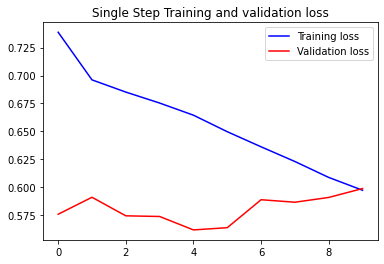

8/8 [==============================] - 1s 3ms/step


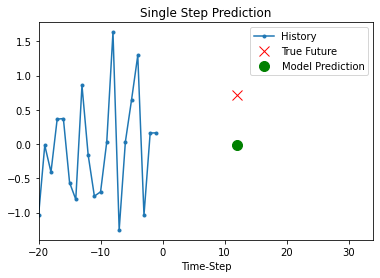

8/8 [==============================] - 0s 3ms/step


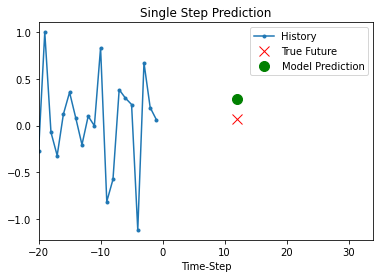

8/8 [==============================] - 0s 2ms/step


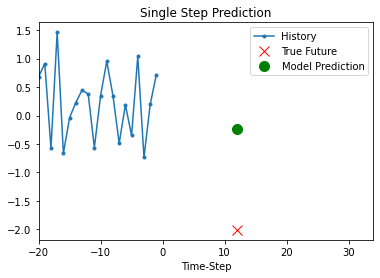

Epoch 1/10
200/200 [==============================] - 3s 14ms/step - loss: 0.7348 - val_loss: 0.8562
Epoch 2/10
200/200 [==============================] - 5s 27ms/step - loss: 0.7060 - val_loss: 0.8651
Epoch 3/10
200/200 [==============================] - 3s 16ms/step - loss: 0.6887 - val_loss: 0.8730
Epoch 4/10
200/200 [==============================] - 3s 15ms/step - loss: 0.6719 - val_loss: 0.8817
Epoch 5/10
200/200 [==============================] - 3s 17ms/step - loss: 0.6545 - val_loss: 0.8928
Epoch 6/10
200/200 [==============================] - 4s 19ms/step - loss: 0.6370 - val_loss: 0.8990
Epoch 7/10
200/200 [==============================] - 4s 18ms/step - loss: 0.6202 - val_loss: 0.9017
Epoch 8/10
200/200 [==============================] - 4s 18ms/step - loss: 0.6015 - val_loss: 0.9146
Epoch 9/10
200/200 [==============================] - 4s 18ms/step - loss: 0.5817 - val_loss: 0.9221
Epoch 10/10
200/200 [==============================] - 3s 17ms/step - loss: 0.5634 - val_lo

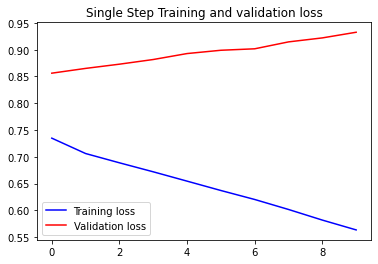

8/8 [==============================] - 0s 2ms/step


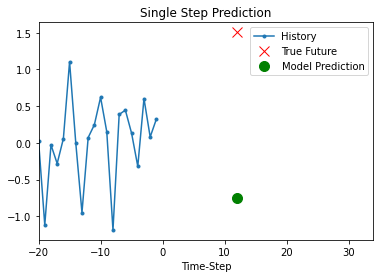

8/8 [==============================] - 0s 2ms/step


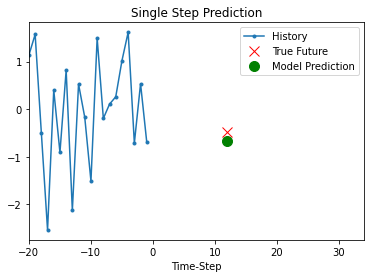

8/8 [==============================] - 0s 2ms/step


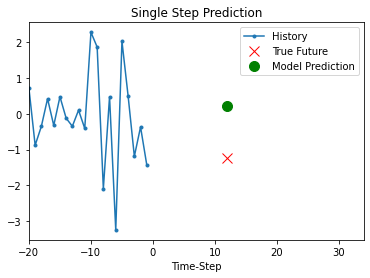

Epoch 1/10
200/200 [==============================] - 3s 17ms/step - loss: 0.6745 - val_loss: 0.5634
Epoch 2/10
200/200 [==============================] - 4s 19ms/step - loss: 0.6083 - val_loss: 0.5683
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5774 - val_loss: 0.5767
Epoch 4/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5525 - val_loss: 0.5828
Epoch 5/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5312 - val_loss: 0.5903
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5117 - val_loss: 0.5964
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 0.4912 - val_loss: 0.6004
Epoch 8/10
200/200 [==============================] - 4s 18ms/step - loss: 0.4752 - val_loss: 0.6092
Epoch 9/10
200/200 [==============================] - 3s 17ms/step - loss: 0.4580 - val_loss: 0.6109
Epoch 10/10
200/200 [==============================] - 4s 20ms/step - loss: 0.4446 - val_lo

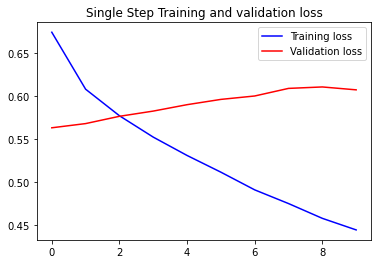

8/8 [==============================] - 0s 2ms/step


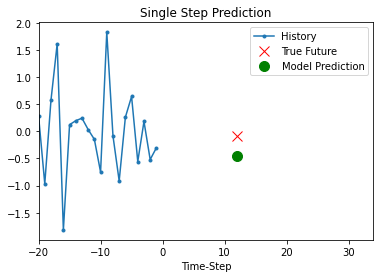

8/8 [==============================] - 0s 3ms/step


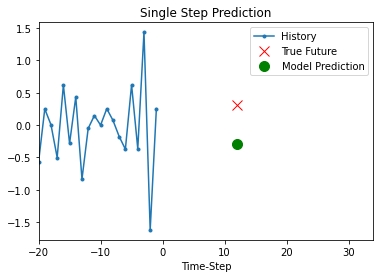

8/8 [==============================] - 0s 3ms/step


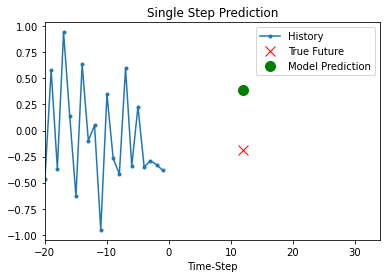

Epoch 1/10
200/200 [==============================] - 3s 17ms/step - loss: 0.7272 - val_loss: 1.1337
Epoch 2/10
200/200 [==============================] - 4s 18ms/step - loss: 0.6840 - val_loss: 1.1434
Epoch 3/10
200/200 [==============================] - 4s 18ms/step - loss: 0.6615 - val_loss: 1.1456
Epoch 4/10
200/200 [==============================] - 4s 18ms/step - loss: 0.6433 - val_loss: 1.1518
Epoch 5/10
200/200 [==============================] - 3s 17ms/step - loss: 0.6266 - val_loss: 1.1490
Epoch 6/10
200/200 [==============================] - 3s 17ms/step - loss: 0.6118 - val_loss: 1.1704
Epoch 7/10
200/200 [==============================] - 3s 17ms/step - loss: 0.6000 - val_loss: 1.1609
Epoch 8/10
200/200 [==============================] - 4s 18ms/step - loss: 0.5886 - val_loss: 1.1849
Epoch 9/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5780 - val_loss: 1.1722
Epoch 10/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5686 - val_lo

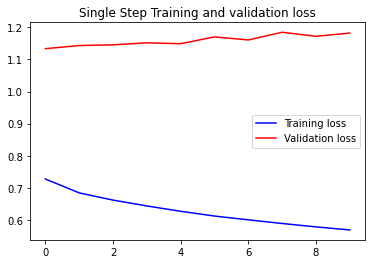

6/6 [==============================] - 0s 3ms/step


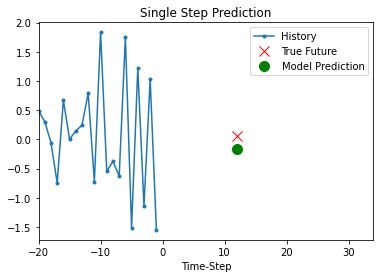

6/6 [==============================] - 0s 3ms/step


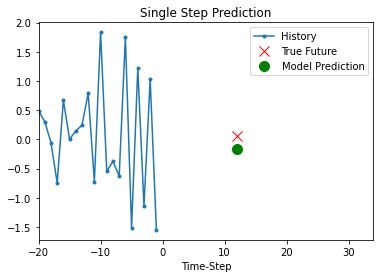

6/6 [==============================] - 0s 3ms/step


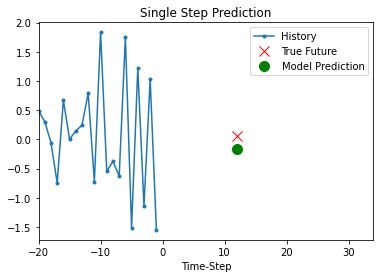

Epoch 1/10
200/200 [==============================] - 4s 19ms/step - loss: 0.7748 - val_loss: 0.7702
Epoch 2/10
200/200 [==============================] - 4s 20ms/step - loss: 0.6799 - val_loss: 0.7845
Epoch 3/10
200/200 [==============================] - 4s 21ms/step - loss: 0.6452 - val_loss: 0.7970
Epoch 4/10
200/200 [==============================] - 4s 19ms/step - loss: 0.6194 - val_loss: 0.8065
Epoch 5/10
200/200 [==============================] - 3s 17ms/step - loss: 0.5968 - val_loss: 0.8257
Epoch 6/10
200/200 [==============================] - 3s 17ms/step - loss: 0.5782 - val_loss: 0.8271
Epoch 7/10
200/200 [==============================] - 3s 17ms/step - loss: 0.5616 - val_loss: 0.8394
Epoch 8/10
200/200 [==============================] - 3s 17ms/step - loss: 0.5453 - val_loss: 0.8554
Epoch 9/10
200/200 [==============================] - 4s 19ms/step - loss: 0.5307 - val_loss: 0.8426
Epoch 10/10
200/200 [==============================] - 3s 17ms/step - loss: 0.5143 - val_lo

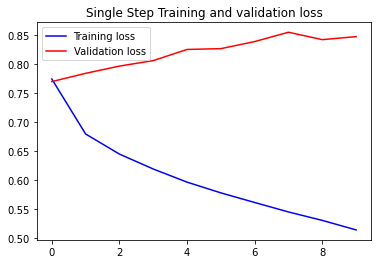

8/8 [==============================] - 0s 4ms/step


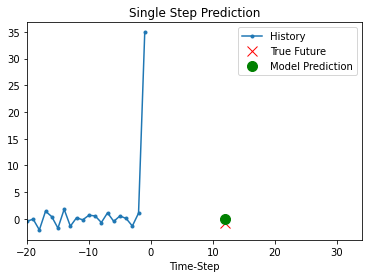

8/8 [==============================] - 0s 2ms/step


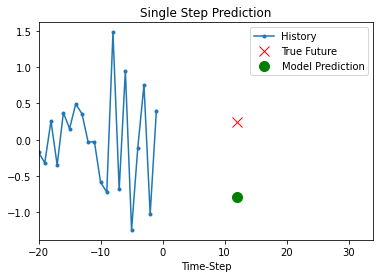

8/8 [==============================] - 0s 2ms/step


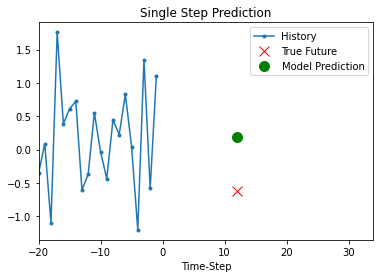

In [207]:
## 這邊都是上面設定過的參數只是複製過來比較好看好使用
TRAIN_SPLIT= 1500
tf.random.set_seed(13)

for part_df in all_df:
    #正規化
    dataset = part_df.values
    data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
    data_std = dataset[:TRAIN_SPLIT].std(axis=0)
    dataset = (dataset-data_mean)/data_std

    #設置參數
    past_history = 20
    future_target = 1
    STEP = 1

    x_train_single, y_train_single = multivariate_data(dataset[:, 3:], dataset[:, -1], 0,
                                                       TRAIN_SPLIT, past_history,
                                                       future_target, STEP,
                                                       single_step=True)
    x_val_single, y_val_single = multivariate_data(dataset[:, 3:], dataset[:, -1],
                                                   TRAIN_SPLIT, None, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

    ## tf.data，弄成generator
    train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
    train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
    val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

    ## training
    single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                                steps_per_epoch=EVALUATION_INTERVAL,
                                                validation_data=val_data_single,
                                                validation_steps=50)

    ## 每一次都把訓練過程跟結果畫出來看看
    plot_train_history(single_step_history,
                       'Single Step Training and validation loss')
    for x, y in val_data_single.take(3):
        plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                        single_step_model.predict(x)[0]], 12,
                       'Single Step Prediction')
        plot.show()